In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
from collections import Counter

In [4]:
df_boston = pd.read_csv('yfcc_usa_boston.csv')
df_boston.head()

,pid,address,user_nickname,date_taken,time_taken,user_tags,longitude,latitude,url,poi,suburb,autotags
0,4572998878,"56574535:Columbus+Park:Suburb,2496012:South+Bo...",jkgreenstein12,2010-05-01,16H 28M 20S,"diana,matt,wedding",-71.047843,42.337190,http://farm4.staticflickr.com/3373/4572998878_...,NaN,South Boston,indoor:0.8120
1,8097701055,"55986802:West+Fens:Suburb,28751241:Fenway:Subu...",Carrie8706,2012-10-17,14H 45M 57S,NaN,-71.094417,42.339831,http://farm9.staticflickr.com/8187/8097701055_...,NaN,Fenway,"architecture:0.7680,art:0.9980,beverage:0.5790..."
2,191684963,"91608707:Forest+Hills+Cemetery:POI,2428482:Jam...",amatern,2006-07-15,16H 52M 58S,"2006,forest+hills+cemetary",-71.104934,42.300159,http://farm1.staticflickr.com/44/191684963_fa8...,Forest Hills Cemetery,Jamaica Plain,"ancient:0.5180,architecture:0.8290,art:0.9160,..."
3,5375199469,"23585254:Massachusetts+State+House:POI,2360582...",Paul-W,2011-01-21,8H 54M 2S,"1989,35mm,b%26w,boston%2C+ma,boston+common,fil...",-71.063513,42.357671,http://farm6.staticflickr.com/5122/5375199469_...,Massachusetts State House,Beacon Hill,"indoor:0.7820,monochrome:0.9400,sleeping:0.582..."
4,2732198461,"56536691:Faneuil+Hall+Marketplace:POI,2393490:...",JCardinal18,2008-08-02,17H 35M 39S,"2008,boston,freedom+trail+pub+crawl,joanna,jos...",-71.055150,42.360414,http://farm4.staticflickr.com/3050/2732198461_...,Faneuil Hall Marketplace,Downtown Boston,"groupshot:1.0000,indoor:0.9790,people:1.0000"


In [63]:
# Cleaning rows having no suburb attribute
df_boston = df_boston[~df_boston.suburb.isna()]

grouped_df = pd.DataFrame(df_boston[['user_nickname', 'suburb']].groupby('user_nickname')['suburb'].apply(list))
grouped_df.head()

,suburb
user_nickname,
%22Cowboy%22+Ben+Alman,"[Back Bay, West Fens, South Boston, South Bost..."
%27J%27,[Palermo]
%2BRob%2B,[Fenway]
%2Fivan,[Downtown Boston]
%3Crs%3E+snaps,"[Jamaica Plain, Greater Mattapan]"


In [152]:
# filtering values that has less check-in
outlier_suburbs = []
sub_counter = dict(Counter(df_boston.suburb.tolist()))
for key in sub_counter.keys():
    if sub_counter[key]<=50: outlier_suburbs.append(key)
print(len(outlier_suburbs))

# filtering users that has less check-in
outlier_users = []
user_counter = dict(Counter(df_boston.user_nickname.tolist()))
for key in user_counter.keys():
    if user_counter[key]<=100 or user_counter[key]>3000: outlier_users.append(key)
len(outlier_users)

72


3549

In [153]:
# Creation of User Item Matrix
user_item_df = pd.pivot_table(
                        df_boston[['user_nickname','suburb']], index=['user_nickname'], columns=['suburb'], aggfunc=len)
user_item_df = user_item_df.drop(outlier_suburbs,axis=1)
user_item_df = user_item_df.drop(outlier_users,axis=0)
user_item_df = user_item_df.fillna(0.)
user_item_df.head()

suburb,Allston,Allston-Brighton,Alumni Stadium,Back Bay,Back Bay East,Back Bay West,Back Of The Hill,Beacon Hill,Brighton,Bunker Hill,...,St. Elizabeth%27s,Stony Brook,Suffolk Downs Station,Telegraph Hill,The Neck,Upper Washington,Waterfront,West End,West Fens,West Roxbury
user_nickname,,,,,,,,,,,,,,,,,,,,,
%7D%7Benry,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,11.0,0.0
%E6%82%89%E8%8C%97_Ivana,0.0,0.0,0.0,25.0,0.0,0.0,0.0,34.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
*Aqualung,0.0,0.0,0.0,138.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-nanio-,167.0,20.0,0.0,141.0,24.0,10.0,1.0,24.0,28.0,0.0,...,13.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,11.0,0.0
6SN7,0.0,0.0,0.0,46.0,28.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
user_item_df.shape

(248, 76)

In [155]:
# columns
user_item_df['Beacon Hill'].max()

479.0

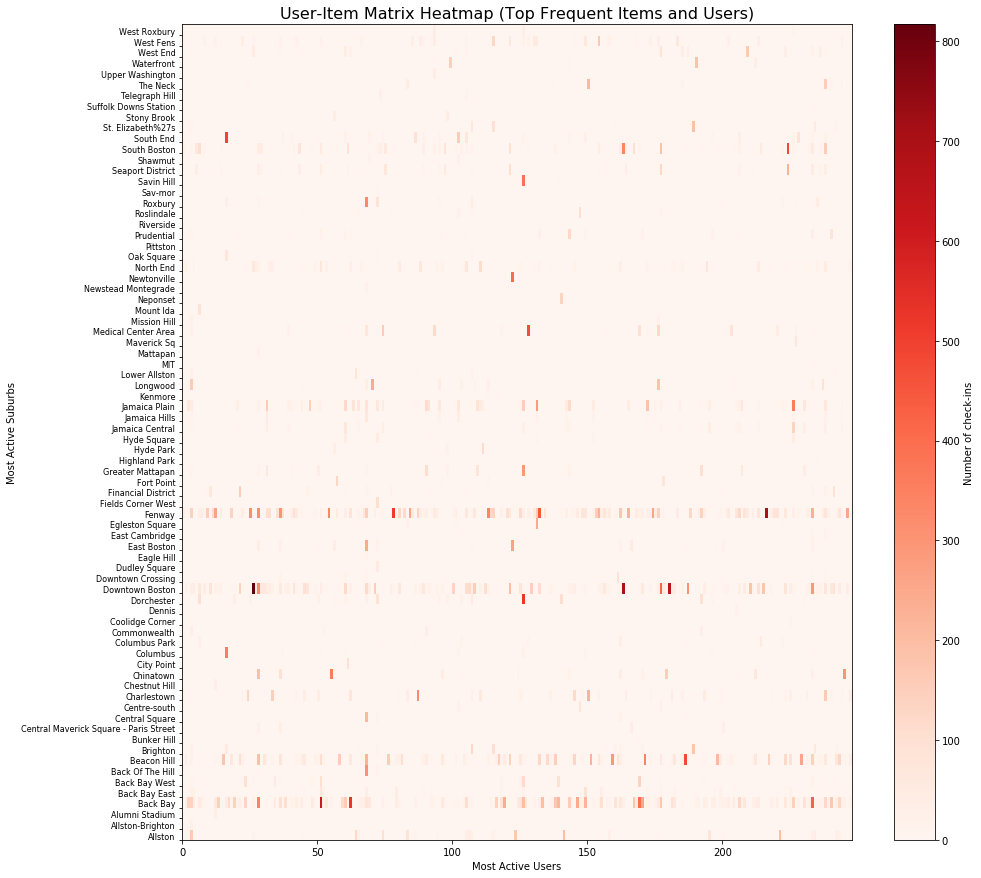

In [162]:
fig, ax = plt.subplots()
fig.set_size_inches((15,15))
data=user_item_df.values.T
#data = np.random.rand(7,24)
rows = user_item_df.index.tolist()
columns = user_item_df.columns.tolist()
ax.set_yticks(np.arange(len(columns)))
ax.set_yticklabels(columns, rotation=0, fontsize=8, rotation_mode="anchor")

plt.pcolor(data,cmap=plt.cm.Reds)
plt.xlabel('Most Active Users')
plt.ylabel('Most Active Suburbs')
plt.title('User-Item Matrix Heatmap (Top Frequent Items and Users)',fontsize=16)
plt.colorbar(label='Number of check-ins')
plt.show()
plt.close()

In [164]:
# filtering values that has less check-in
outlier_suburbs = []
sub_counter = dict(Counter(df_boston.suburb.tolist()))
for key in sub_counter.keys():
    if sub_counter[key]<=10: outlier_suburbs.append(key)
# print(len(outlier_suburbs))

# filtering users that has less check-in
outlier_users = []
user_counter = dict(Counter(df_boston.user_nickname.tolist()))
for key in user_counter.keys():
    if user_counter[key]<=10: outlier_users.append(key)
len(outlier_users)
# Creation of User Item Matrix
user_item_df = pd.pivot_table(
                        df_boston[['user_nickname','suburb']], index=['user_nickname'], columns=['suburb'], aggfunc=len)
user_item_df = user_item_df.drop(outlier_suburbs,axis=1)
user_item_df = user_item_df.drop(outlier_users,axis=0)
user_item_df = user_item_df.fillna(0.)
user_item_df.head()

suburb,Allston,Allston-Brighton,Alumni Stadium,Back Bay,Back Bay East,Back Bay West,Back Of The Hill,Beacon Hill,Bellevue Hill,Boston Heights,...,Uphams Corner,Upper Washington,Washington Park,Waterfront,Wellington Hill,West Broadway,West End,West Fens,West Lower Mills,West Roxbury
user_nickname,,,,,,,,,,,,,,,,,,,,,
%22Cowboy%22+Ben+Alman,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0
%5BA.B.%5D,0.0,0.0,0.0,6.0,3.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
%5Bmarco+castelli%5D,0.0,0.0,0.0,5.0,1.0,2.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
%5C%2F+%2F%5C+%7C_,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
%7D%7Benry,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,11.0,0.0,0.0


In [165]:
user_item_df.shape

(1344, 99)

Text(0.5,1,'Mean Check-ins accross Suburbs in Boston')

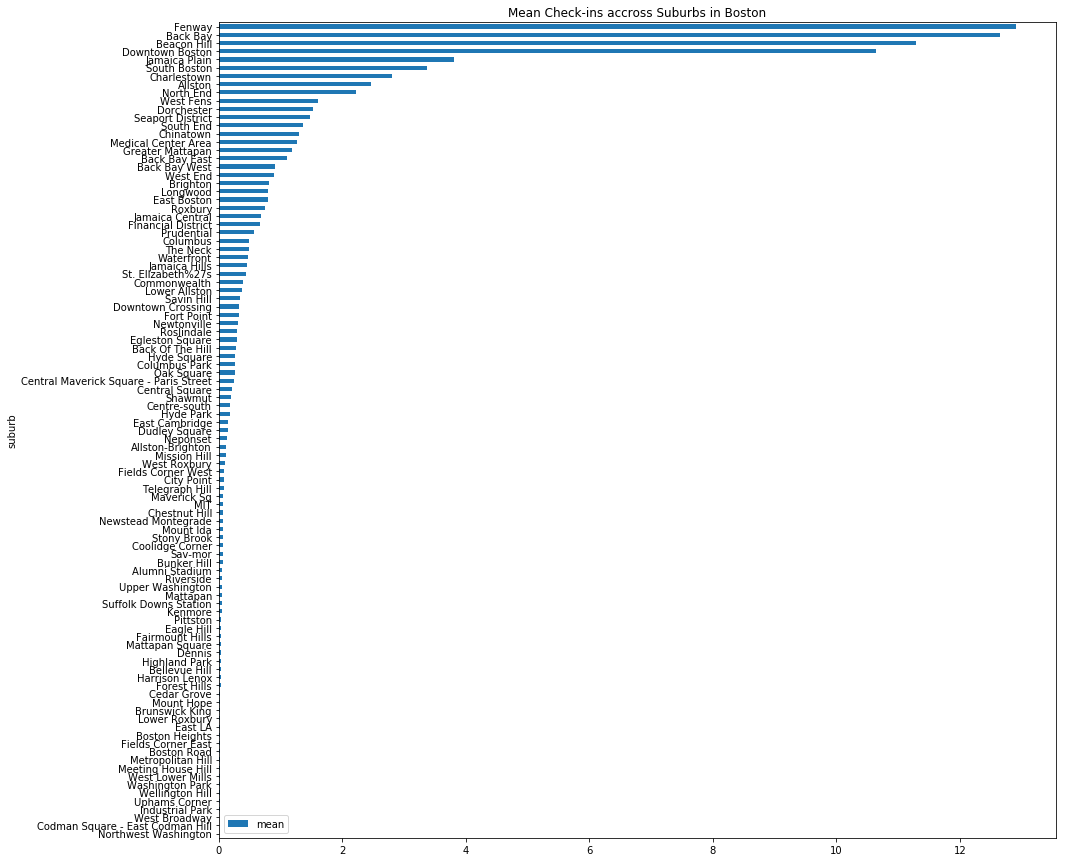

In [180]:
fig, ax = plt.subplots()
fig.set_size_inches((15,15))
user_item_df.describe().T[['mean']].sort_values('mean', ascending=True).plot(kind='barh', ax=ax)
ax.set_title('Mean Check-ins accross Suburbs in Boston')

In [181]:
user_item_df.describe()

suburb,Allston,Allston-Brighton,Alumni Stadium,Back Bay,Back Bay East,Back Bay West,Back Of The Hill,Beacon Hill,Bellevue Hill,Boston Heights,...,Uphams Corner,Upper Washington,Washington Park,Waterfront,Wellington Hill,West Broadway,West End,West Fens,West Lower Mills,West Roxbury
count,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,...,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000
mean,2.461310,0.109375,0.055804,12.645833,1.110119,0.911458,0.271577,11.286458,0.029018,0.018601,...,0.010417,0.050595,0.014881,0.464286,0.013393,0.006696,0.888393,1.612351,0.014881,0.103423
std,25.545369,1.646975,1.095178,39.234023,4.649094,7.337034,8.458645,88.304568,0.774629,0.482404,...,0.237658,1.148199,0.342674,6.821536,0.349192,0.098158,6.873999,8.456935,0.296043,1.597798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,822.000000,51.000000,36.000000,609.000000,94.000000,137.000000,309.000000,3067.000000,28.000000,13.000000,...,7.000000,41.000000,10.000000,184.000000,12.000000,2.000000,163.000000,168.000000,8.000000,41.000000


In [183]:
user_item_df.head()

suburb,Allston,Allston-Brighton,Alumni Stadium,Back Bay,Back Bay East,Back Bay West,Back Of The Hill,Beacon Hill,Bellevue Hill,Boston Heights,...,Uphams Corner,Upper Washington,Washington Park,Waterfront,Wellington Hill,West Broadway,West End,West Fens,West Lower Mills,West Roxbury
user_nickname,,,,,,,,,,,,,,,,,,,,,
%22Cowboy%22+Ben+Alman,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0
%5BA.B.%5D,0.0,0.0,0.0,6.0,3.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
%5Bmarco+castelli%5D,0.0,0.0,0.0,5.0,1.0,2.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
%5C%2F+%2F%5C+%7C_,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
%7D%7Benry,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,11.0,0.0,0.0


In [182]:
import networkx as nx
from networkx.algorithms import bipartite

In [187]:
pd.melt(user_item_df, id_vars='user_nickname', 
            value_vars=list(user_item_df.columns[1:]), # list of days of the week
            var_name='suburb').head()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,user_nickname,suburb,value
0,NaN,Allston-Brighton,0.0
1,NaN,Allston-Brighton,0.0
2,NaN,Allston-Brighton,0.0
3,NaN,Allston-Brighton,0.0
4,NaN,Allston-Brighton,0.0


In [189]:
edges=[]
for i, row in user_item_df.iterrows():
    for j in range(len(row)):
        if row[j]!=0.:
            edges.append((i,user_item_df.columns.tolist()[j],row[j]))
#     break
# edges

In [191]:
B = nx.Graph()
B.add_nodes_from(user_item_df.index.tolist(), bipartite=0) 
B.add_nodes_from(user_item_df.columns.tolist(), bipartite=1) 

B.add_weighted_edges_from([e for e in edges])

In [193]:
_nodes_ = {n for n, d in B.nodes(data=True) if d['bipartite']==1}
len(_nodes_)

99

In [204]:
G_projection = bipartite.weighted_projected_graph(B, _nodes_)

In [206]:
G_projection = max(nx.connected_component_subgraphs(G_projection), key=len)

In [229]:
edges = G_projection.edges()
weights = [G_projection[u][v]['weight']/100 for u,v in edges]
# weights

In [222]:
# list(G_projection.nodes())

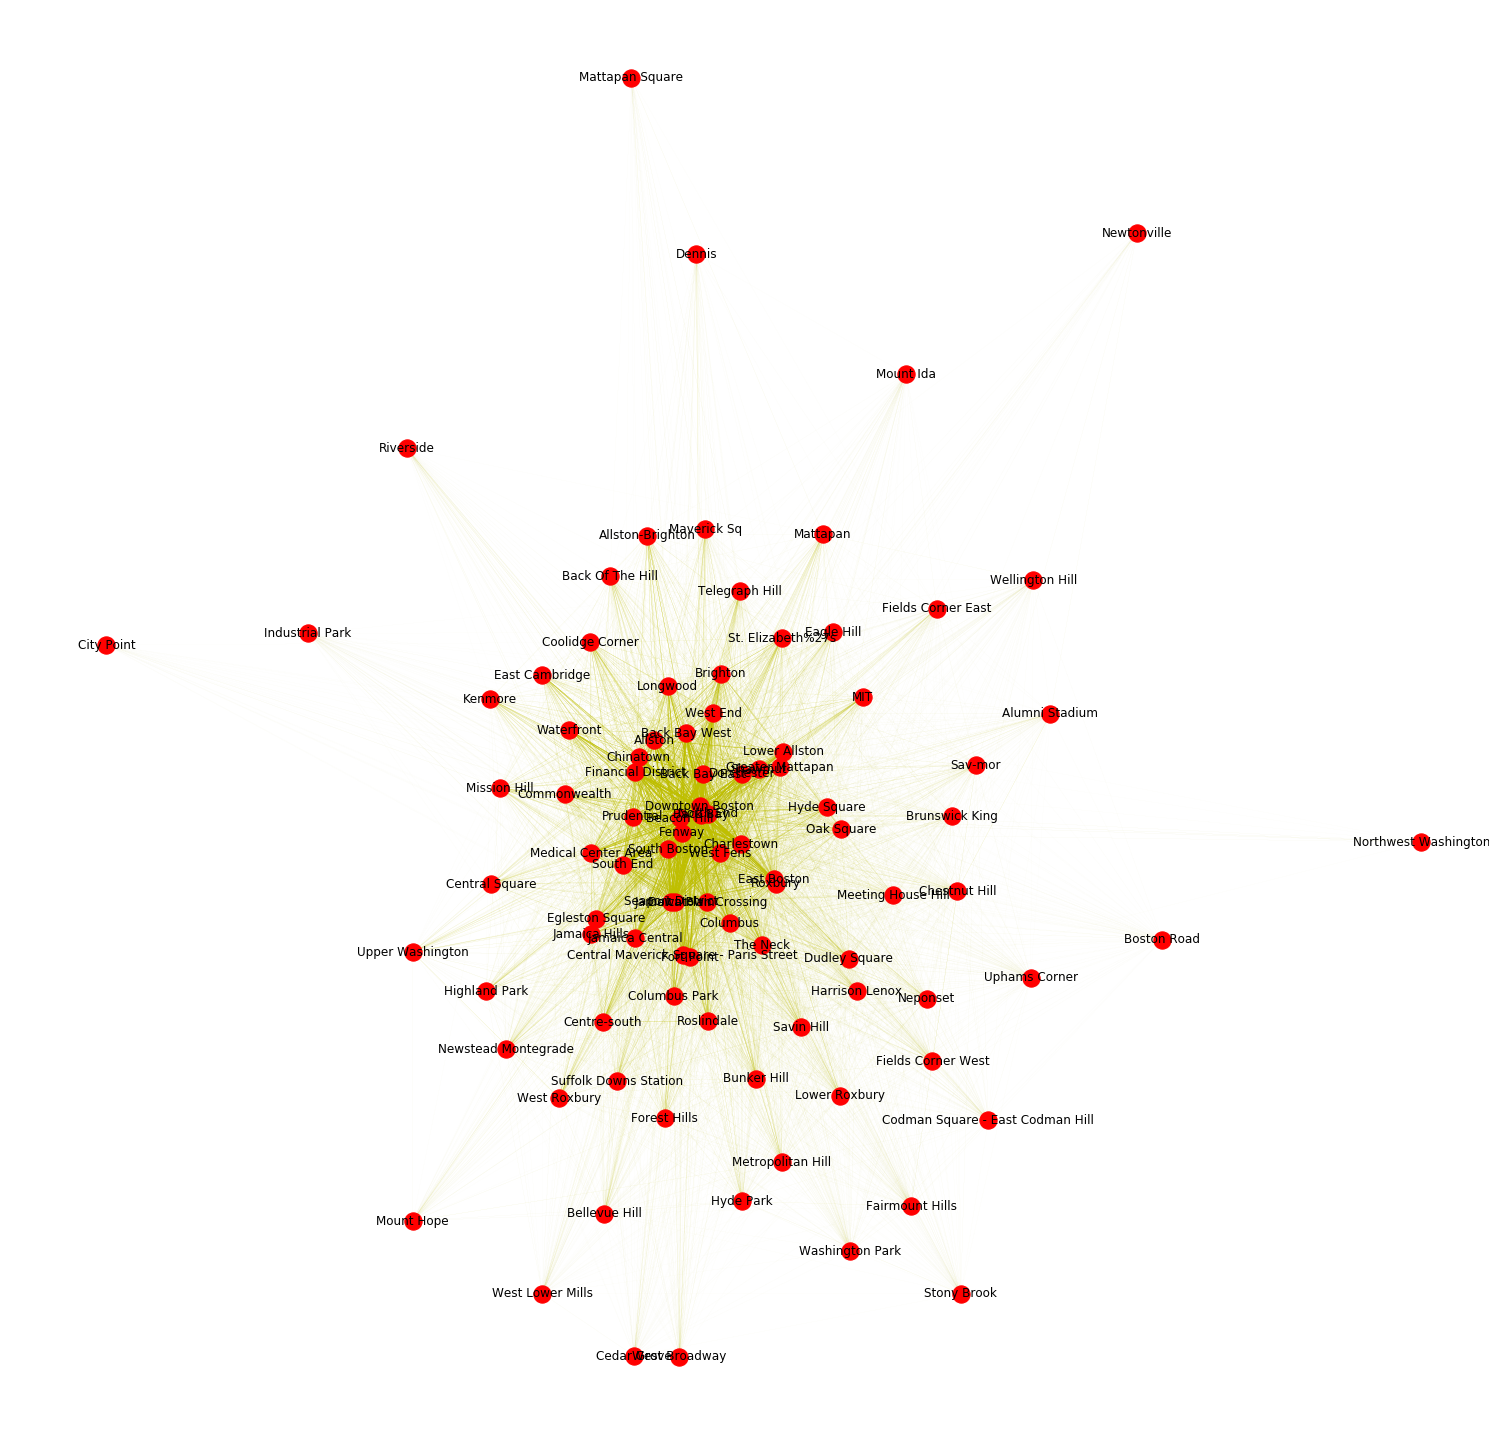

In [233]:
fig, ax = plt.subplots(1, 1, figsize=(26, 26))
pos = nx.spring_layout(G_projection,scale=2)
labels=nx.draw_networkx_labels(G_projection,pos, font_color='k')
nx.draw(G_projection,pos,font_size=8,width=weights, edge_color='y', ax=ax)